In [51]:
from importlib import reload
import os
import numpy as np
import time
from tqdm import trange
from pulsestreamer import *
from nidaqmx import *

import analysis
reload(analysis)
from analysis import *

import measurement
reload(measurement)
from measurement import *

In [5]:
# # loading the local Pulse Streamer and NIDAQmx

# IPaddress = findPulseStreamers(search_serial='')[0][0]
# pulser = PulseStreamer(IPaddress)

# DAQ_device = nidaqmx.system.System.local().devices[0]
# device_name = DAQ_device.terminals[0:1][0][1:5]
# print(f'NIDAQmx device name : {device_name}')

In [7]:
specs_ports = {'laserNum' : 1, 'gateStart' : 5, 'source' : 7}

specs_delay = {'rising_delay' : 2,'gatelen' :  6, 'laserontime' :  31,'delay_pad' :  2,'delay_shift' :  2,'gatesourcedelay' : 2}
specs_t1 = {'rising_delay' : 20,'gatelen' : 2e3, 'laserontime' : 25e3,'delay_pad' : 20,'delay_shift' : 150e3,'gatesourcedelay' : 5,'evolution_time' : 1.5e6}
specs_snr = {'rising_delay' : 20,'gatelen' : 2e3, 'laserontime' : 25e3,'delay_pad' : 20,'delay_shift' : 150e3,'gatesourcedelay' : 5,'evolution_time' : 1.5e6}
specs_lifetime = {'rising_delay' : 20,'gatelen' : 2e3, 'laserontime' : 25e3,'delay_pad' : 20,'delay_shift' : 150e3,'gatesourcedelay' : 5,'evolution_time' : 1.5e6}  #change this 

In [9]:
# total_specs = specs_ports.update(specs_t1)   #change the specs name accordingly
# avg_data,time_axis = measure(pulser,device_name,exp_name = 't1',
#                    samples=2000,averages=30,specificatons=total_specs)

In [11]:
avg_data = np.arange(1,11,1)
time_axis = avg_data

In [13]:
dict_args = {'avg_data':avg_data,'time_axis':time_axis}

In [15]:
root_directory = os.getcwd()
print(f'root directory : {root_directory}')

root directory : C:\Users\Administrator\OneDrive\Desktop\T1_measurement\atanu_github\Instrument_Automation\Experimental_Applications


In [17]:
year = time.ctime()[-4:]
date = time.ctime()[4:10].replace(' ','_')
current_time = time.ctime()[-13:-8].replace(':','_')

folder_path = root_directory+f'/exp_data/{year}/{date}/dummy_example/snr/avgs_30/samples_2000'
file_name = f'[{current_time}]_gatelen_2000ns.npz'

total_path = npz_save(folder_path,file_name,**dict_args)

saving data_file '[14_47]_gatelen_2000ns.npz' is successful!



In [19]:
load_data = dict(np.load(total_path))

specifications to the plot

In [28]:
date

'Aug_22'

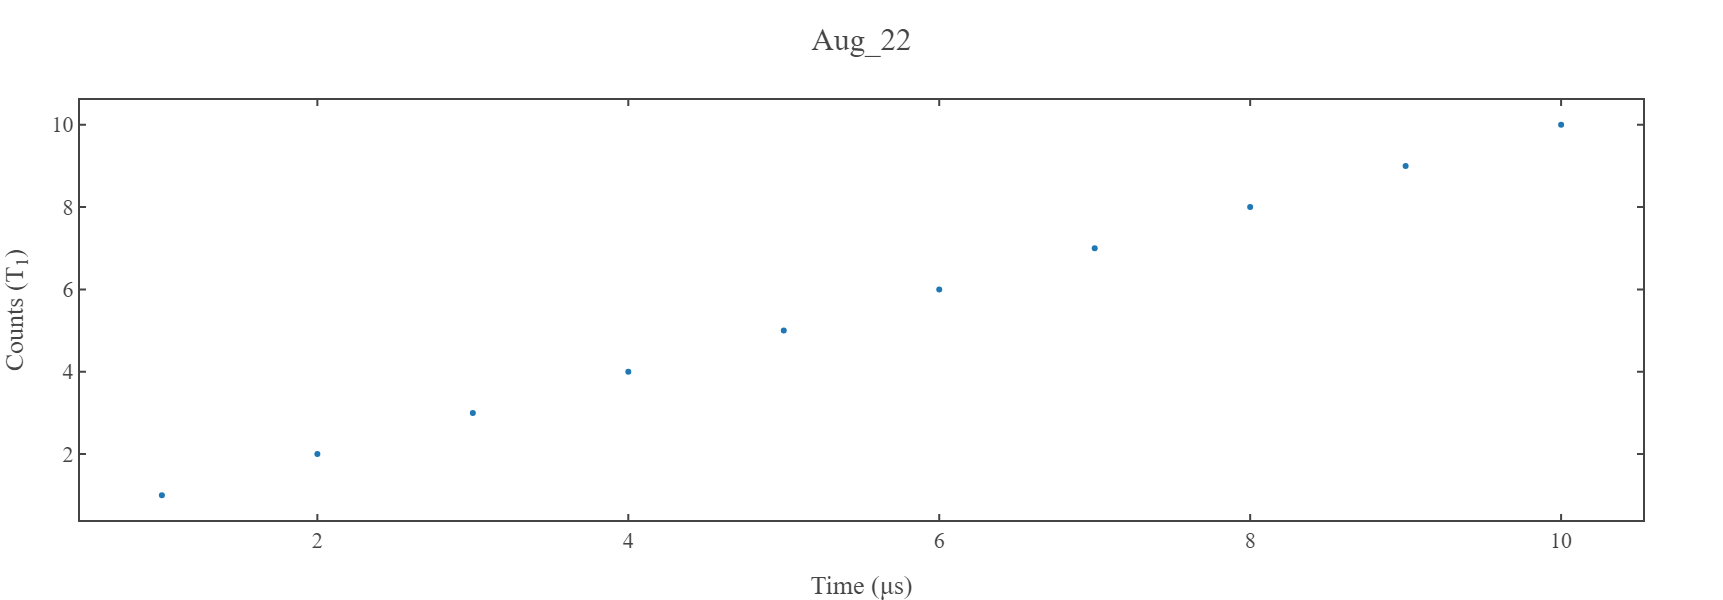

In [53]:
x=load_data['time_axis']
y=load_data['avg_data']
fig = simple_plot(x,y,x_name = "Time (&mu;s)",y_name = "Counts (T<sub>1</sub>)",title=date)